## Serial Code - HDR merging, Histogram Equalization, Sharpening, Saturation

In [44]:
%matplotlib inline
import numpy as np
import scipy
import PIL
import matplotlib.pyplot as plt
import PIL.Image as im

In [2]:
from scipy import ndimage

In [34]:
show = lambda img: plt.imshow(img)
gshow = lambda img: plt.imshow(img, cmap = plt.get_cmap('gray'))
rgb2gray = lambda rgb: np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

In [ ]:
def rgb2lab ( inputColor ) :
"""
From 
"""
    num = 0
    RGB = [0, 0, 0]

    for value in inputColor :
        value = float(value) / 255

        if value > 0.04045 :
            value = ( ( value + 0.055 ) / 1.055 ) ** 2.4
        else :
            value = value / 12.92

        RGB[num] = value * 100
        num = num + 1

    XYZ = [0, 0, 0,]

    X = RGB [0] * 0.4124 + RGB [1] * 0.3576 + RGB [2] * 0.1805
    Y = RGB [0] * 0.2126 + RGB [1] * 0.7152 + RGB [2] * 0.0722
    Z = RGB [0] * 0.0193 + RGB [1] * 0.1192 + RGB [2] * 0.9505
    XYZ[ 0 ] = round( X, 4 )
    XYZ[ 1 ] = round( Y, 4 )
    XYZ[ 2 ] = round( Z, 4 )

    XYZ[ 0 ] = float( XYZ[ 0 ] ) / 95.047         # ref_X =  95.047   Observer= 2°, Illuminant= D65
    XYZ[ 1 ] = float( XYZ[ 1 ] ) / 100.0          # ref_Y = 100.000
    XYZ[ 2 ] = float( XYZ[ 2 ] ) / 108.883        # ref_Z = 108.883

    num = 0
    for value in XYZ :

        if value > 0.008856 :
            value = value ** ( 0.3333333333333333 )
        else :
            value = ( 7.787 * value ) + ( 16 / 116 )

        XYZ[num] = value
        num = num + 1

    Lab = [0, 0, 0]

    L = ( 116 * XYZ[ 1 ] ) - 16
    a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
    b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

    Lab [ 0 ] = round( L, 4 )
    Lab [ 1 ] = round( a, 4 )
    Lab [ 2 ] = round( b, 4 )

    return Lab

**Legend**:

i: imagefile

or: origin

In [4]:
i_or1 = scipy.misc.imread('../orig_0.jpg')
i_or2 = scipy.misc.imread('../orig_1.jpg')
i_or3 = scipy.misc.imread('../orig_2.jpg')
i_or4 = scipy.misc.imread('../orig_3.jpg')

In [14]:
i_avg = ((i_or1.astype(float)+i_or2+i_or3+i_or4)/4.).astype(int)

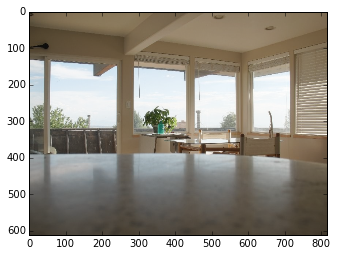

In [28]:
plt.imshow(i_avg.astype(np.uint8))

In [35]:
i_avg_bw = rgb2gray(i_avg)

In [39]:
i_avg_blur1 = ndimage.gaussian_filter(i_avg_bw,2)

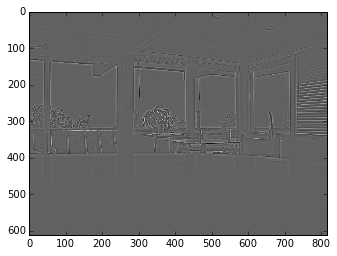

In [42]:
m_unsharp = i_avg_bw-i_avg_blur1